In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()
Pkg.add("ForwardDiff")
Pkg.add("LinearAlgebra")
Pkg.add("PyPlot")

  Activating project at `~/Projects/learning/lecture-notebooks/Lecture 4`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ ~/Projects/learning/lecture-notebooks/Lecture 4/Manifest.toml:0
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/home/xinyu/Projects/learning/lecture-notebooks/Lecture 4/Manifest.toml` has an old format that is being maintained.
│ To update to the new format, which is supported by Julia versions ≥ 1.6.2, run `import Pkg; Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
│ To then record the julia version re-resolve with `Pkg.resolve()` and if there are resolve conflicts consider `Pkg.update()`.
└ @ Pkg.Types ~/.julia/juliaup/julia-1.11.1+0.x64.linux.gnu/share/julia/stdlib/v1.11/Pkg/src/manifest.jl:318
  No Changes to `~/Projects/learning/lecture-noteb

In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
Q = Diagonal([0.5; 1])
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end
function ∇f(x)
    return Q*(x-[1; 0])
end
function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [4]:
function c(x)
    return x[1]^2 + 2*x[1] - x[2]
end
function ∂c(x)
    return [2*x[1]+2 -1]
end

∂c (generic function with 1 method)

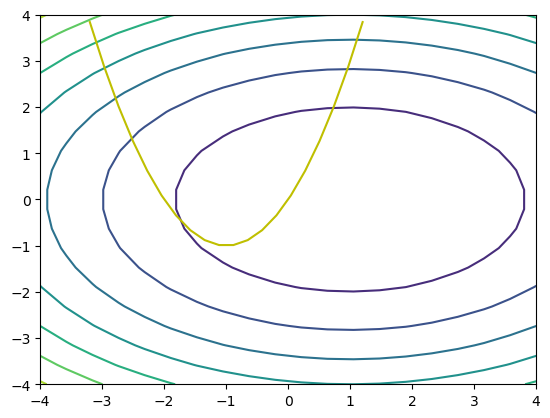

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7798f69c5e40>

In [78]:
function plot_landscape()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp),LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)',LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp,Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    contour(Xsamp,Ysamp,Zsamp)

    xc = LinRange(-3.2,1.2,Nsamp)
    plot(xc,xc.^2+2.0.*xc,"y")
end

plot_landscape()

In [79]:
function newton_step(x0,λ0)
    H = ∇2f(x0) + ForwardDiff.jacobian(x -> ∂c(x)'*λ0, x0)
    C = ∂c(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

newton_step (generic function with 1 method)

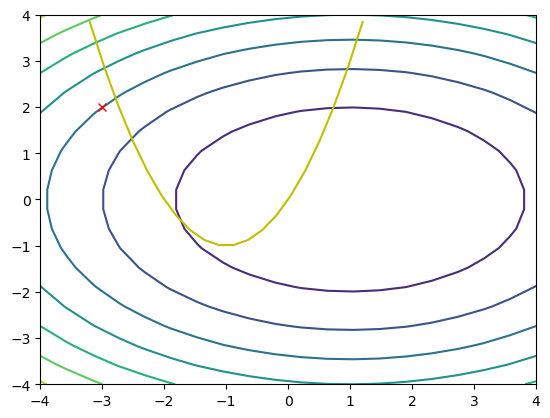

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7798f6858430>

In [80]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

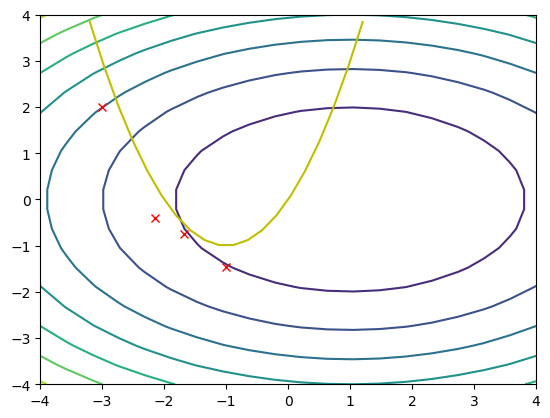

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7798f67d25f0>

In [84]:
xnew, λnew = newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")

In [82]:
H = ∇2f(xguess[:,end]) + ForwardDiff.jacobian(x -> ∂c(x)'*λguess[end], xguess[:,end])

2×2 Matrix{Float64}:
 -0.287879  0.0
  0.0       1.0

In [10]:
function gauss_newton_step(x0,λ0)
    H = ∇2f(x0)
    C = ∂c(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

gauss_newton_step (generic function with 1 method)

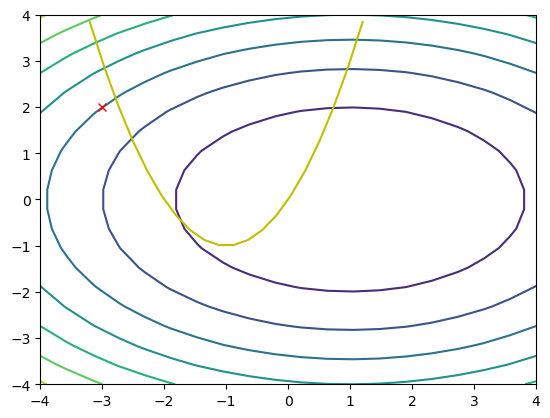

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x779903abece0>

In [11]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

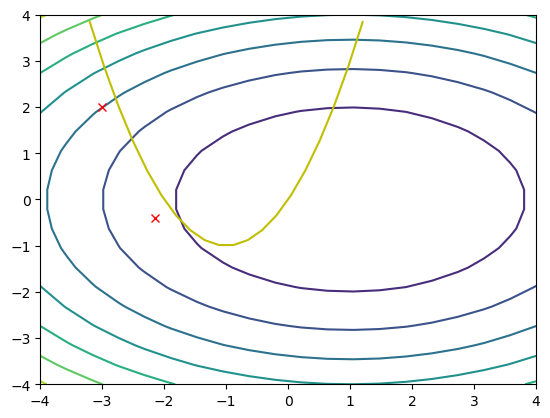

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7799038560e0>

In [12]:
xnew, λnew = gauss_newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")